# Example 01: MNIST Demo

## (i) Import libraries

In [1]:
import sys
sys.path.append('../')
import sys
import matplotlib.pyplot as plt
import visualization

## (ii) Plot classification accuracy
The dotted lines correspond to the epoch number at which the refinement phase started. 

['/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run2_with_1.4_t_8_autoaug/checkpoints/records.pkl']
['/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run2_with_1.4_t_8_autoaug/checkpoints/model.pth']


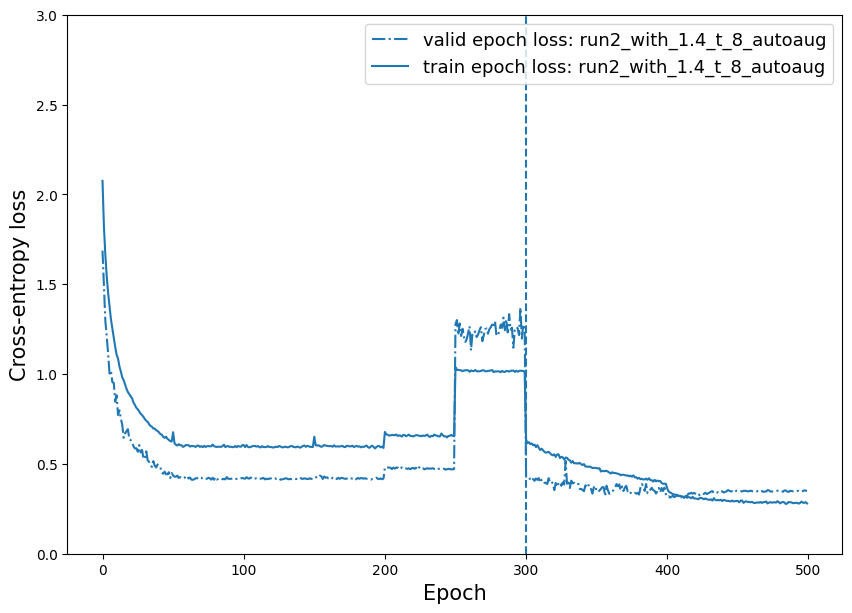

run2_with_1.4_t_8_autoaug: test accuracy = 89.66999816894531


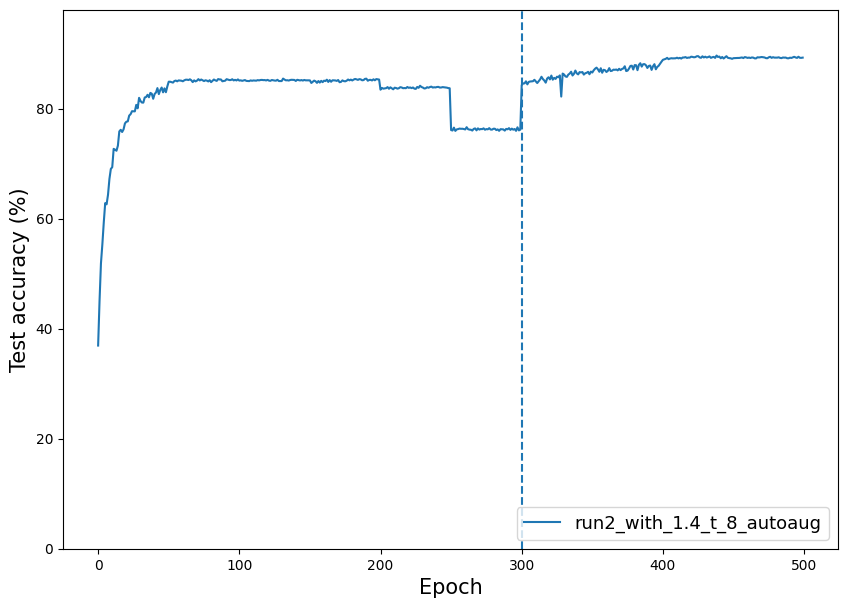

In [7]:
%matplotlib inline

# exp_dir = '/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2light/'
exp_dir = '/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/'
# exp_dir = '/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2tiny/'
models_list = ["run2_with_1.4_t_8_autoaug"]
# models_list = ["run0", 'run1_with_0.8_expansion_4', "run1_with_1.4_expansion_8"]
# models_list = ["run0", 'run1_with_0.8_expansion_4', "run1_with_1.4_expansion_8", "run2_with_1.4_expansion_6", "run2_with_1.4_expansion_6_autoaug", "run2_with_1.4_t_8_autoaug"]
# models_list = ["run0_with_1.4_t_8_autoaug"]


records_file_list = [exp_dir + model_name + '/checkpoints/records.pkl' for model_name in models_list]
model_files = [exp_dir + model_name + '/checkpoints/model.pth' for model_name in models_list]

print(records_file_list)
print(model_files)

visualization.plot_performance(records_file_list, models_list, ymax = 3.0, figsize=(10,7), finetune_position=True)
visualization.plot_accuracy(records_file_list, models_list, figsize=(10,7), ymin=0, ymax=98, finetune_position=True)

In [8]:
_ = visualization.compute_number_of_params(model_files, models_list, is_gpu=False)


Model: run2_with_1.4_t_8_autoaug
Number of parameters summary:
    Total: 5141493 
    Max per branch: 4934923 
    Min per branch: 4833672 
    Average per branch: 4901172.666666667


## (iii) Compute model size

In [4]:
import ptflops

from models import Tree
from utils import load_tree_model

# model_path = "/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2light/run0/checkpoints/model.pth"
# model_path = '/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run0/checkpoints/model.pth'
# model_path = "/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run1_with_0.8_expansion_4/checkpoints/model.pth"
# model_path = "/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run1_with_1.4_expansion_8/checkpoints/model.pth"
# model_path = "/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run2_with_1.4_expansion_6/checkpoints/model.pth"
# model_path = "/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2/run2_with_1.4_expansion_6_autoaug/checkpoints/model.pth"

# model_path = "/home/dummy/Project/SubspaceLearningMachine_SoftTree/experiments/cifar10/mbv2tiny/run0_with_1.4_t_8_autoaug/checkpoints/model.pth"
model_path = ''
model = load_tree_model(model_path)
print(model)

flops, params = ptflops.get_model_complexity_info(model, (3, 32, 32), as_strings=True, print_per_layer_stat=True)
print('Flops:  ' + flops)
print('Params: ' + params)

Tree(
  (tree_modules): ModuleList(
    (0): Sequential(
      (transform): Root_MBV2tiny(
        (features): Sequential(
          (0): Sequential(
            (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): InvertedResidual(
            (conv): Sequential(
              (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=24, bias=False)
              (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
              (3): Conv2d(24, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
          )
          (2): InvertedResidual(
            (conv): Sequential(
              (0): Conv2d(16

/home/dummy/Project/SubspaceLearningMachine_SoftTree/examples/../models.py:1810: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


## (iv) Visualise the tree structure

     Plotting:  hist_split_node_finetune.png


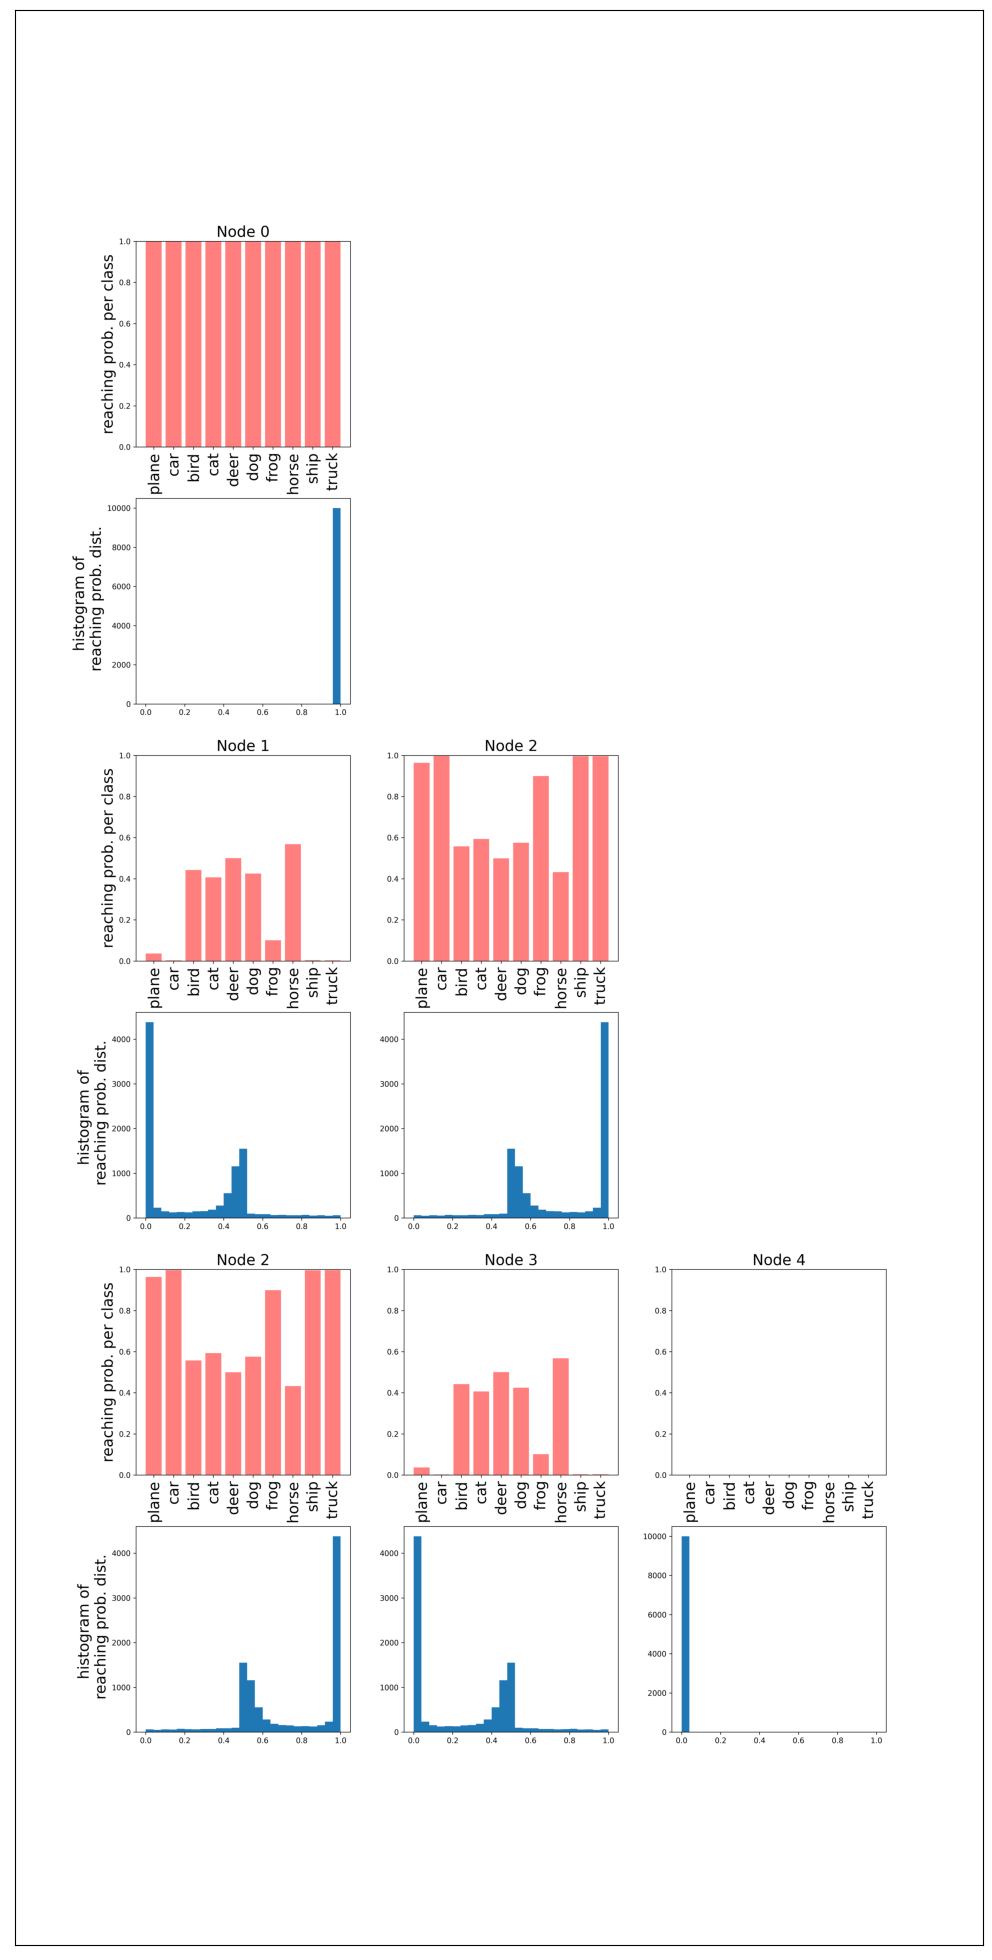

In [6]:
fig_dir = exp_dir + 'run0' + '/figures/'
visualization.visualize_treestructures(fig_dir, figsize=(10,20))